In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
city_data_df = city_data_df.drop_duplicates('city')
ride_data_df = pd.read_csv(ride_data)


# Combine the data into a single dataset
merge_df = pd.merge(city_data_df, ride_data_df, on="city")

# Display the data table for preview
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
#Find the average fare per city.
average_fare = merge_df.groupby("city")["fare"].mean()

#Find the total rides per city.
total_rides = merge_df.groupby("city")["ride_id"].count()

#Find the total number of drivers per city.
total_drivers = merge_df.groupby("city")["driver_count"].mean()

city_type = city_data_df.set_index('city')['type']


city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [5]:
pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type
})
pyber_cities.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [6]:
#urban
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]

#suburban
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]

#rural
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]

## Bubble Plot of Ride Sharing Data

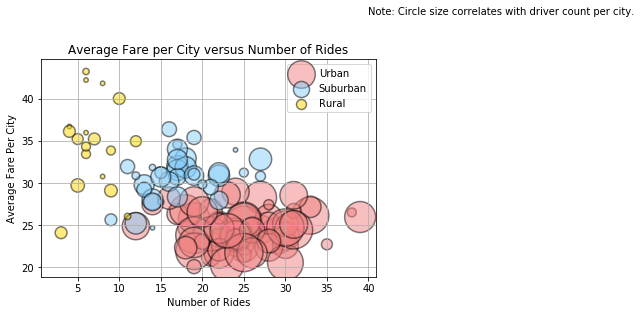

In [7]:
# Obtain the x and y coordinates for each of the three city types
plt.title("Average Fare per City versus Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")

# Build the scatter plots for each city types
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "lightcoral", edgecolors="black", s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "gold", edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)

# Create a legend
plt.legend(loc= "upper right")

#show plot
plt.grid()

## Total Fares by City Type

In [8]:
city_fare_pie = merge_df.groupby(["type"])["fare"].sum()
city_fare_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

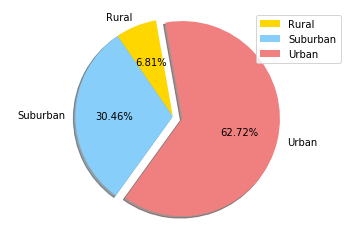

In [9]:
# Calculate Type Percents
city_fare_pie = merge_df.groupby(["type"])["fare"].sum()
city_fare_pie.index

# Build Pie Chart

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.

explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 100)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")
plt.show()

## Total Rides by City Type

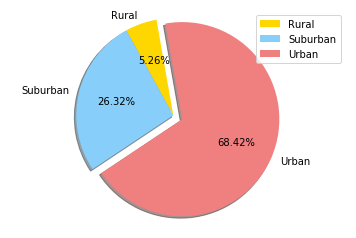

In [10]:
# Calculate Ride Percents
city_rides_pie = merge_df.groupby(["type"])["ride_id"].count()

# Build Pie Chart

#Use the City Pie index for wedge labels.
city_rides_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.
explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle=100)

#Tell Matplotlib that we wnat the pie chart to have equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show figure
plt.show()

## Total Drivers by City Type

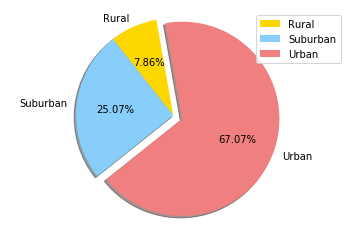

In [11]:
# Calculate Driver Percents
city_drivers_pie = merge_df.groupby(["type"])["driver_count"].mean()

# Build Pie Charts

#Use the City Pie index for the wedge labels.
city_drivers_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#explode the third section of the pie chart.

explode = (0,0,0.1)

#Create the pie chart.
plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle=100)

#Tell Matplotlib that we want the chart to have equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show Figure
plt.show()

In [12]:
## Three Observable Trends
#Overall, urban areas have more fares, rides, and drivers for Uber.
#There is less use for Uber in rural areas overall.
#The trends remain consistent for each data set. No matter which element of the Uber data you look at, it starts with higher numbers for urban areas, medium for suburan, and miniscule for rural.
